In [1]:
import os

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import tensorflow as tf

if os.getcwd().split(os.sep)[-1] == 'notebook':
    os.chdir('..')

from cma import CMA
from notebook.utils import (
    plot_3d_surface,
    plot_2d_contour,
    plot_generations,
    draw_confidence_ellipse,
    plot_mean_coordinates,
)

In [2]:
tf.random.set_seed(444)  # set random seed for reproducibility

In [3]:
sns.set(palette='colorblind')

In [4]:
def fitness_fn(x):
    """
    Six-Hump Camel Function
    https://www.sfu.ca/~ssurjano/camel6.html
    """
    return (
        (4 - 2.1 * x[:,0]**2 + x[:,0]**4 / 3) * x[:,0]**2 +
        x[:,0] * x[:,1] +
        (-4 + 4 * x[:,1]**2) * x[:,1]**2
    )

In [5]:
cma = CMA(
    initial_solution=[1.5, -0.4],
    initial_step_size=1.0,
    fitness_function=fitness_fn,
    store_trace=True,
)
best_solution, best_fitness = cma.search()

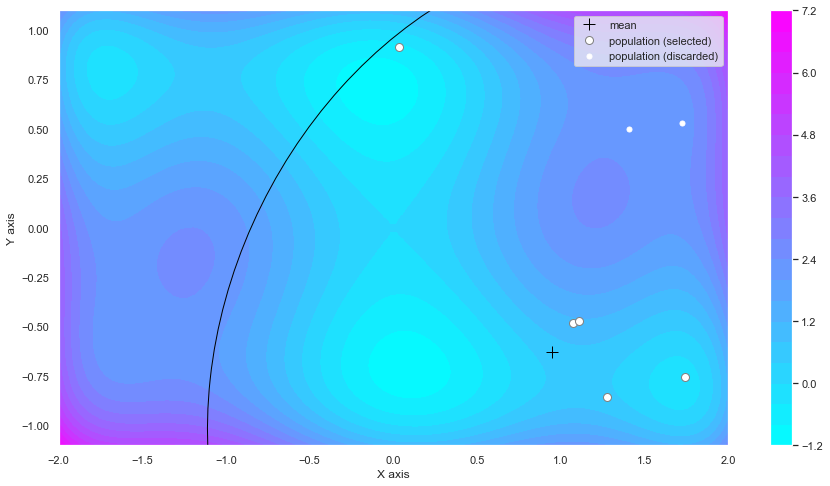

In [6]:
generation = 2
trace = cma.trace[generation]
mean = trace['m']
B = trace['B']
D = trace['D']
l = np.diagonal(trace['D'])**2
population = trace['population']

f, ax = plot_2d_contour(
    fitness_fn,
    xlim=[-2, 2], 
    ylim=[-1.1, 1.1],
    mean=mean,
    solutions=population,
)
draw_confidence_ellipse(ax, mean, B, l);

In [7]:
z = tf.random.normal((10, 2), dtype=tf.float64)
zb = tf.matmul(z, B)
zbd = tf.matmul(z, tf.matmul(B, D))

In [14]:
def draw_ellipse_and_axes(ax, mean, eigenvectors, eigenvalues):
    origin = [0], [0]
    draw_confidence_ellipse(ax, mean, eigenvectors, eigenvalues)
    quiver_kwargs = dict(color='green', angles='xy', scale_units='xy', scale=1)
    ax.quiver(*origin, [eigenvalues[0] * eigenvectors[0,0]], [eigenvalues[0] * eigenvectors[0,1]], **quiver_kwargs);
    quiver_kwargs['color'] = 'red'
    ax.quiver(*origin, [eigenvalues[1] * eigenvectors[1,0]], [eigenvalues[1] * eigenvectors[1,1]], **quiver_kwargs);

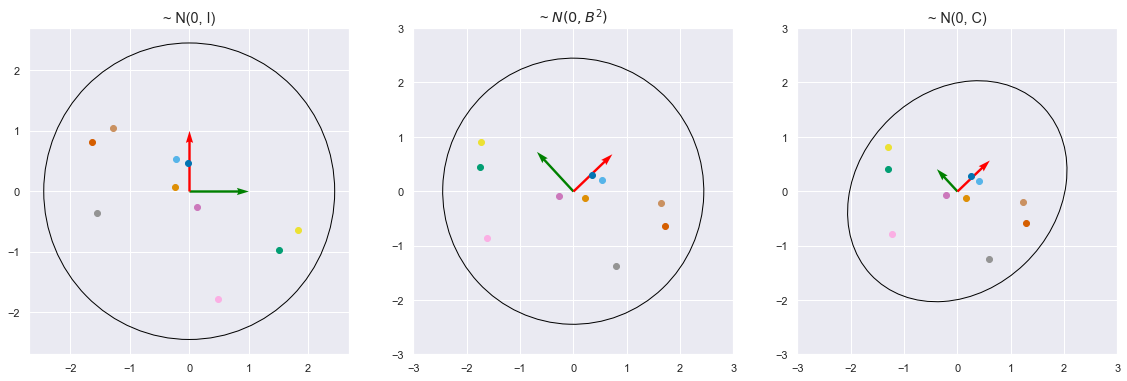

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(3 * 6 + 1.5, 6))

for x, y in z.numpy():
    ax1.plot(x, y, 'o')

ax.set_xlim([-3, 3]);
ax.set_ylim([-3, 3]);
draw_ellipse_and_axes(ax1, mean=[0, 0], eigenvectors=np.eye(2), eigenvalues=[1, 1])
ax1.set_title('~ N(0, I)', fontdict=dict(fontsize='large'));

for x, y in zb.numpy():
    ax2.plot(x, y, 'o')

ax2.set_xlim([-3, 3]);
ax2.set_ylim([-3, 3]);
draw_ellipse_and_axes(ax2, mean=[0, 0], eigenvectors=B, eigenvalues=[1, 1])
ax2.set_title('~ ' + '$N(0, B^2)$', fontdict=dict(fontsize='large'))

for x, y in zbd.numpy():
    ax3.plot(x, y, 'o')

ax3.set_xlim([-3, 3]);
ax3.set_ylim([-3, 3]);
draw_ellipse_and_axes(ax3, mean=[0, 0], eigenvectors=B, eigenvalues=l)
ax3.set_title('~ N(0, C)', fontdict=dict(fontsize='large'));